# Caracterizando al cluster de clientes numero 6

Gracias a la tabla de Características Distintivas sabemos de este grupo que:

1. Los clientes de este grupo se caracterizan por comprar camisetas en la categoria de ropa
2. Provienen de los estados de: Illinois, Wyoming, Oregon, Kentucky, Louisiana, Michigan, Minnesota 

Gracias a la tabla de Análisis Comparativo del Clúster 1 vs. Otros Clústeres sabemos de este grupo que:

1. Para la variable Age los grupos con media y mediana significativamente menor son 2, 3, 8, 4 y no existen grupos menos dispersos que este 
2. Para la variable Purchase Amount (USD) no existen grupos con media, mediana y dispersion significativamente menor
3. Para la variable Review Rating los grupos con media y mediana significativamente menor son 2, 1, 6, 3, 0, 9 y no existen grupos menos dispersos que este
4. Para la variable Previous Purchases el grupo con media y mediana significativamente menor es el 4 y no existen grupos menos dispersos que este

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kruskal, chi2_contingency, mannwhitneyu
from IPython.display import display, Markdown

df_customer = pd.read_csv("dataset/segmented_customers.csv")
# df_customer.head()

# Filtramos el DataFrame para el Clúster 6 (etiquetado como 5) 
df_cluster_6 = df_customer[df_customer['Cluster'] == 5].copy()

#### Pregunta 1: ¿Existe alguna diferencia en la proporción de descuentos aplicados entre hombres y mujeres en el Clúster 6?

# Tabla de Contingencia: Género vs. Descuento Aplicado


Discount Applied,No,Yes
Gender,,
Female,58,0
Male,39,71



# Resultados de la Prueba de Chi-Cuadrado
Estadístico Chi-Cuadrado: 62.2200
Valor p: 0.0000
Grados de libertad (dof): 1


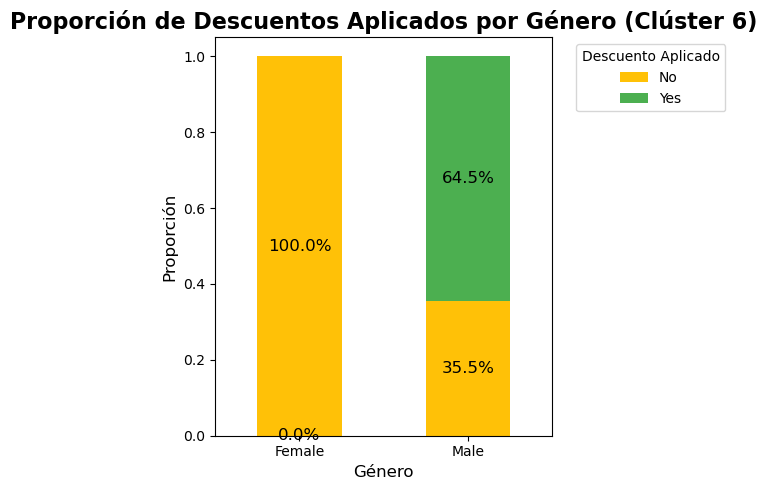



# Conclusiones del Análisis
El valor p (0.0000) es menor que el nivel de significancia (0.05).
Existe una asociación estadísticamente significativa entre el género y si se aplicó un descuento en el Clúster 6.


In [3]:
# 2. Realizar la prueba de Chi-Cuadrado de independencia
# Crear la tabla de contingencia de 'Gender' vs. 'Discount Applied'
contingency_table = pd.crosstab(df_cluster_6['Gender'], df_cluster_6['Discount Applied'])

print("# Tabla de Contingencia: Género vs. Descuento Aplicado")
display(contingency_table)

# Realizar la prueba de chi-cuadrado
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("\n# Resultados de la Prueba de Chi-Cuadrado")
print(f"Estadístico Chi-Cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (dof): {dof}")

# 3. Generar el gráfico de barras apiladas
# Normalizar la tabla para mostrar proporciones
proportions = contingency_table.div(contingency_table.sum(1), axis=0)

# Definir una paleta de colores para el gráfico
colors = ['#FFC107', '#4CAF50'] # Color para 'No' y 'Yes'

# Crear el gráfico
ax = proportions.plot(kind='bar', stacked=True, figsize=(6, 5), rot=0, color=colors)

# Personalizar el gráfico
plt.title('Proporción de Descuentos Aplicados por Género (Clúster 6)', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Descuento Aplicado', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas a las barras
for c in ax.containers:
    labels = [f'{v.get_height():.1%}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# 4. Conclusiones
print("\n" + "="*50 + "\n")
print("# Conclusiones del Análisis")
if p_value < 0.05:
    print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia (0.05).")
    print("Existe una asociación estadísticamente significativa entre el género y si se aplicó un descuento en el Clúster 6.")
else:
    print(f"El valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia (0.05).")
    print("No hay una asociación estadísticamente significativa entre el género y si se aplicó un descuento en el Clúster 6.")


Conclusiones del Análisis
El análisis de la tabla de contingencia y la prueba de Chi-Cuadrado revelan una diferencia estadísticamente significativa (p<0.05) en la aplicación de descuentos entre los géneros dentro del Clúster 6.

1. Mujeres (Female): De las 58 clientas en la muestra de este clúster, ninguna recibió un descuento. La totalidad de las compras de mujeres no tuvieron un descuento aplicado.

2. Hombres (Male): En contraste, de los 110 clientes hombres en la muestra (39 + 71), un total de 71 recibieron un descuento, mientras que 39 no lo recibieron.

3. Resultado Clave: El valor p de 0.0000 indica una asociación muy fuerte. Esto sugiere que, en el Clúster 6, los descuentos fueron aplicados de manera desproporcionada a los clientes masculinos, mientras que las clientes femeninas no se beneficiaron de ellos en esta muestra. Este patrón de compra es una característica distintiva de este segmento.

#### Pregunta 2: ¿Existe una diferencia significativa en la calificación de las reseñas (Review Rating) entre hombres y mujeres en el Clúster 6?

# Resultado de la Prueba de Mann-Whitney U
Estadístico de la prueba U: 2620.0000
Valor p: 0.0571


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1656\587919425.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Review Rating', data=df_cluster_6, palette='Set2')


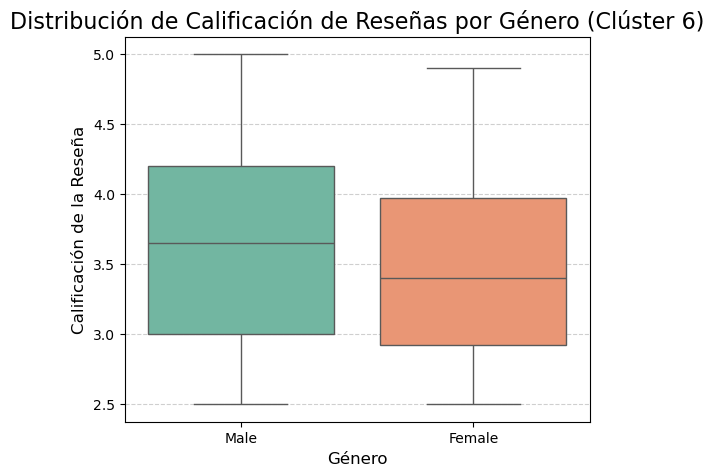

### Conclusiones del Análisis


El valor p ($0.0571$) es mayor o igual que el nivel de significancia ($0.05$).
No hay una diferencia estadísticamente significativa en el `Review Rating` entre hombres y mujeres en el Clúster 6. Esto sugiere que, en general, la percepción de la calidad del producto o servicio es similar para ambos géneros en este segmento de clientes.


In [4]:
# 1. Preparamos los datos para la prueba de Mann-Whitney U
# Separamos los 'Review Rating' por género
ratings_female = df_cluster_6[df_cluster_6['Gender'] == 'Female']['Review Rating']
ratings_male = df_cluster_6[df_cluster_6['Gender'] == 'Male']['Review Rating']

# Realizamos la prueba estadística
# Verificamos que ambos grupos tengan datos para poder realizar la prueba
if len(ratings_female) > 0 and len(ratings_male) > 0:
    statistic, p_value = mannwhitneyu(ratings_female, ratings_male, alternative='two-sided')
    
    # Imprimimos el resultado de la prueba
    print("# Resultado de la Prueba de Mann-Whitney U")
    print(f"Estadístico de la prueba U: {statistic:.4f}")
    print(f"Valor p: {p_value:.4f}")
else:
    print("No hay suficientes datos en al menos una de las categorías de género para realizar la prueba.")
    p_value = 1.0 # Asignamos un valor p de 1.0 si la prueba no se puede realizar

# 2. Generamos un gráfico de caja (boxplot) para visualizar la distribución
plt.figure(figsize=(6, 5))
# Usamos el parámetro 'palette' para colores distintos
sns.boxplot(x='Gender', y='Review Rating', data=df_cluster_6, palette='Set2') 

# Personalizamos el gráfico
plt.title('Distribución de Calificación de Reseñas por Género (Clúster 6)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Calificación de la Reseña', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 3. Presentamos las conclusiones en formato Markdown
print("\n" + "="*50 + "\n")
display(Markdown('### Conclusiones del Análisis'))
if p_value < 0.05:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es menor que el nivel de significancia ($0.05$).
Existe una diferencia estadísticamente significativa en el `Review Rating` entre hombres y mujeres en el Clúster 6. El análisis del gráfico de caja sugiere que...
"""))
else:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia ($0.05$).
No hay una diferencia estadísticamente significativa en el `Review Rating` entre hombres y mujeres en el Clúster 6. Esto sugiere que, en general, la percepción de la calidad del producto o servicio es similar para ambos géneros en este segmento de clientes.
"""))

#### Pregunta 3:¿Existe una diferencia significativa en el Estatus de Suscripción entre géneros en el Clúster 6?


# Tabla de Contingencia para el Clúster 6


Subscription Status,No,Yes
Gender,,
Female,58,0
Male,64,46



# Resultado de la Prueba de Chi-cuadrado en el Clúster 6
Estadístico Chi-cuadrado: 31.3297
Valor p: 0.0000
Grados de libertad (dof): 1


<Figure size 1000x600 with 0 Axes>

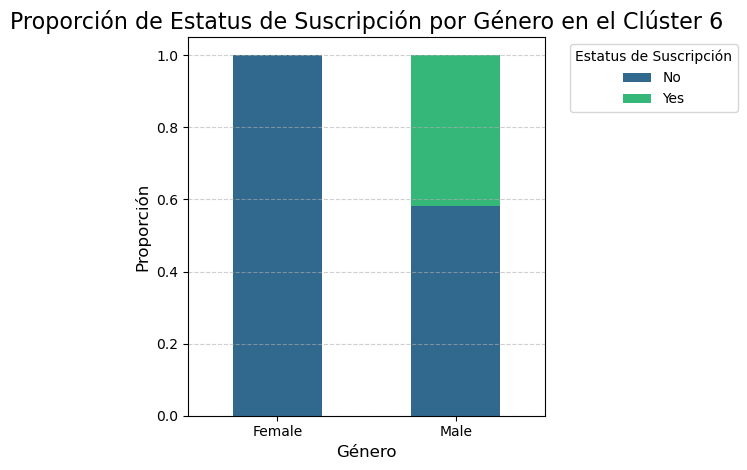

### Conclusiones del Análisis en el Clúster 6


El valor p ($0.0000$) es menor que el nivel de significancia ($0.05$).
Esto indica que existe una **relación estadísticamente significativa** entre las variables `Gender` y `Subscription Status` dentro del Clúster 6. El gráfico de barras apiladas muestra visualmente esta diferencia en las proporciones de suscripción para cada género.


In [5]:
# Creamos la tabla de contingencia para el Clúster 6
contingency_table_cluster6 = pd.crosstab(df_cluster_6['Gender'], df_cluster_6['Subscription Status'])
print("\n# Tabla de Contingencia para el Clúster 6")
display(contingency_table_cluster6)

# Realizamos la prueba de Chi-cuadrado de independencia en el Clúster 6
chi2, p_value, dof, expected = chi2_contingency(contingency_table_cluster6)

# Imprimimos los resultados de la prueba
print("\n# Resultado de la Prueba de Chi-cuadrado en el Clúster 6")
print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (dof): {dof}")

# Normalizamos la tabla para mostrar proporciones en el gráfico apilado
normalized_table = contingency_table_cluster6.div(contingency_table_cluster6.sum(axis=1), axis=0)

# Creamos el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
normalized_table.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', n_colors=len(contingency_table_cluster6.columns)))

# Personalizamos el gráfico
plt.title('Proporción de Estatus de Suscripción por Género en el Clúster 6', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Estatus de Suscripción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Conclusión del análisis en formato Markdown
print("\n" + "="*50 + "\n")
display(Markdown('### Conclusiones del Análisis en el Clúster 6'))
if p_value < 0.05:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es menor que el nivel de significancia ($0.05$).
Esto indica que existe una **relación estadísticamente significativa** entre las variables `Gender` y `Subscription Status` dentro del Clúster 6. El gráfico de barras apiladas muestra visualmente esta diferencia en las proporciones de suscripción para cada género.
"""))
else:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia ($0.05$).
Esto indica que **no hay una relación estadísticamente significativa** entre las variables `Gender` y `Subscription Status` dentro del Clúster 6. El gráfico de barras apiladas refleja que las proporciones del estado de suscripción son similares para ambos géneros en este segmento.
"""))

#### Pregunta 4:

# ¿Existe una diferencia en la compra de camisas por género entre las diferentes estaciones en el Clúster 6?

El siguiente análisis explorará si la proporción de compras de camisas (`Item Purchased` = 'Shirt') entre los géneros (`Gender`) varía significativamente en las diferentes estaciones (`Season`), utilizando una tabla de contingencia, una prueba de Chi-cuadrado y un gráfico de barras agrupadas.


# Tabla de Contingencia: Género vs. Estación para la compra de 'Shirt'


Season,Fall,Spring,Summer,Winter
Gender,,,,
Female,15,11,11,21
Male,24,31,26,29



# Resultado de la Prueba de Chi-cuadrado
Estadístico Chi-cuadrado: 3.1703
Valor p: 0.3661
Grados de libertad (dof): 3


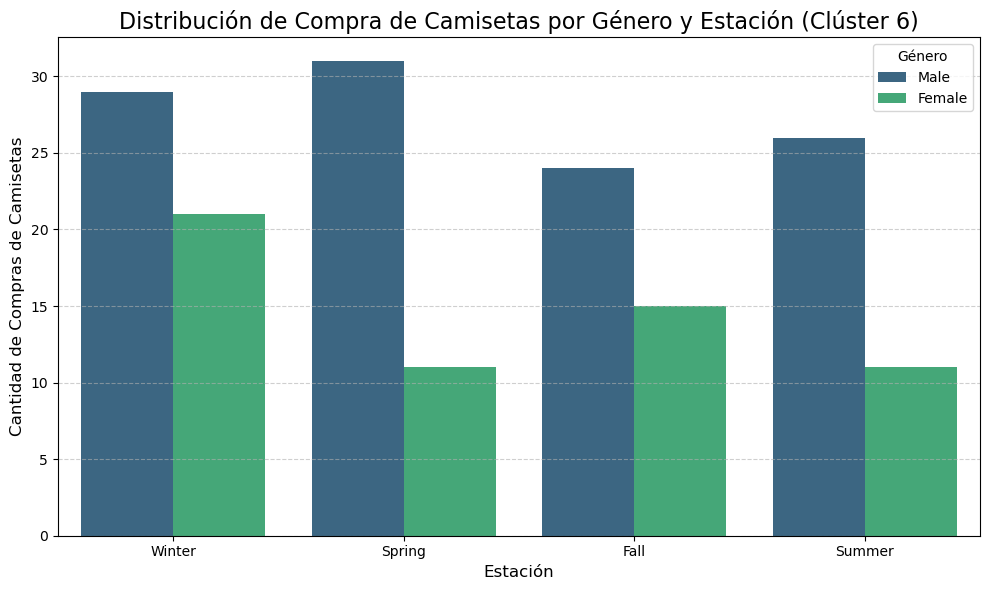

### Conclusiones del Análisis


El valor p ($0.3661$) es mayor o igual que el nivel de significancia ($0.05$). Esto indica que **no hay una relación estadísticamente significativa** entre el género y la estación para la compra de camisetas. La proporción de compras de camisas por género parece ser similar en todas las estaciones para los clientes de este clúster.


In [6]:
# Pregunta en Markdown para el cuaderno
display(Markdown("# ¿Existe una diferencia en la compra de camisas por género entre las diferentes estaciones en el Clúster 6?"))
display(Markdown("El siguiente análisis explorará si la proporción de compras de camisas (`Item Purchased` = 'Shirt') entre los géneros (`Gender`) varía significativamente en las diferentes estaciones (`Season`), utilizando una tabla de contingencia, una prueba de Chi-cuadrado y un gráfico de barras agrupadas."))

# 1. Filtramos el DataFrame para incluir solo las compras de 'Shirt'
df_shirt_cluster_6 = df_cluster_6[df_cluster_6['Item Purchased'] == 'Shirt'].copy()

# 2. Creamos la tabla de contingencia entre 'Gender' y 'Season' para las compras de 'Shirt'
contingency_table = pd.crosstab(df_shirt_cluster_6['Gender'], df_shirt_cluster_6['Season'])

print("\n# Tabla de Contingencia: Género vs. Estación para la compra de 'Shirt'")
display(contingency_table)

# 3. Realizamos la prueba de Chi-cuadrado de independencia
# Esta prueba nos dirá si existe una relación estadísticamente significativa
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimimos los resultados de la prueba
print("\n# Resultado de la Prueba de Chi-cuadrado")
print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad (dof): {dof}")

# 4. Creamos el gráfico de barras agrupadas para visualizar los datos
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Gender', data=df_shirt_cluster_6, palette='viridis', order=df_shirt_cluster_6['Season'].value_counts().index)

# Personalizamos el gráfico
plt.title('Distribución de Compra de Camisetas por Género y Estación (Clúster 6)', fontsize=16)
plt.xlabel('Estación', fontsize=12)
plt.ylabel('Cantidad de Compras de Camisetas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Género', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 5. Conclusión del análisis en formato Markdown
print("\n" + "="*50 + "\n")
display(Markdown('### Conclusiones del Análisis'))
if p_value < 0.05:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es menor que el nivel de significancia ($0.05$). Esto indica una **relación estadísticamente significativa** entre el género y la estación para la compra de camisetas. En otras palabras, la proporción de compras de camisas por género no es la misma en todas las estaciones. El gráfico de barras lo muestra claramente.
"""))
else:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia ($0.05$). Esto indica que **no hay una relación estadísticamente significativa** entre el género y la estación para la compra de camisetas. La proporción de compras de camisas por género parece ser similar en todas las estaciones para los clientes de este clúster.
"""))

#### Pregunta 5:

# ¿Existe una diferencia entre el número de compras previas y el género en el Clúster 6?

El siguiente análisis explorará si el número de compras previas (`Previous Purchases`) es estadísticamente diferente entre los géneros (`Gender`), utilizando una prueba no paramétrica U de Mann-Whitney y un gráfico de violín.


# Resultado de la Prueba U de Mann-Whitney
Estadístico U: 2944.5000
Valor p: 0.4136


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1656\836180091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Previous Purchases', data=df_cluster_6, palette='Set2')


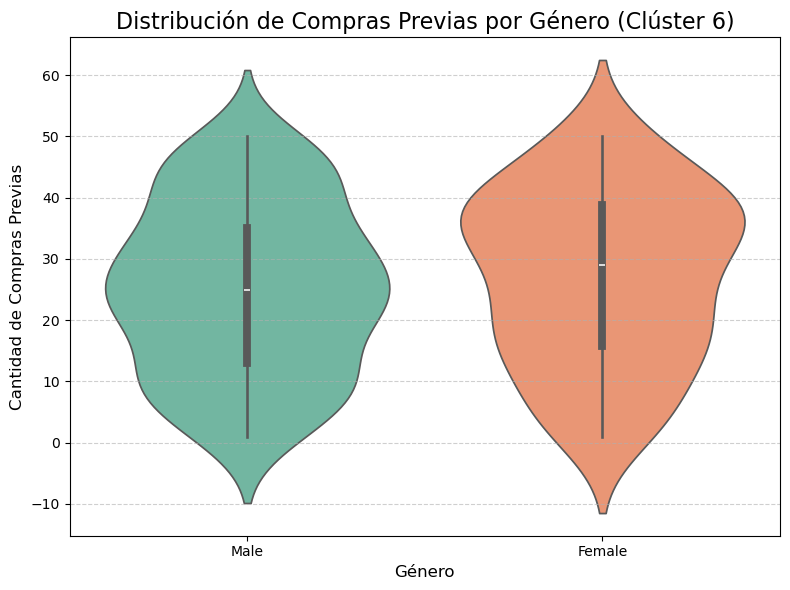

### Conclusiones del Análisis


El valor p ($0.4136$) es mayor o igual que el nivel de significancia ($0.05$). Esto indica que **no hay una diferencia estadísticamente significativa** en la cantidad de compras previas entre los géneros masculino y femenino en el Clúster 6. La distribución de compras previas parece ser similar para ambos géneros en este clúster.


In [7]:
# Pregunta en Markdown para el cuaderno
display(Markdown("# ¿Existe una diferencia entre el número de compras previas y el género en el Clúster 6?"))
display(Markdown("El siguiente análisis explorará si el número de compras previas (`Previous Purchases`) es estadísticamente diferente entre los géneros (`Gender`), utilizando una prueba no paramétrica U de Mann-Whitney y un gráfico de violín."))

# 1. Separamos los datos de 'Previous Purchases' por género
male_purchases = df_cluster_6[df_cluster_6['Gender'] == 'Male']['Previous Purchases']
female_purchases = df_cluster_6[df_cluster_6['Gender'] == 'Female']['Previous Purchases']

# 2. Realizamos la prueba U de Mann-Whitney
# Esta prueba nos dirá si hay una diferencia significativa en las medianas de las compras previas entre los dos géneros
u_statistic, p_value = mannwhitneyu(male_purchases, female_purchases)

# Imprimimos los resultados de la prueba
print("\n# Resultado de la Prueba U de Mann-Whitney")
print(f"Estadístico U: {u_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# 3. Creamos un gráfico de violín para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Previous Purchases', data=df_cluster_6, palette='Set2')

# Personalizamos el gráfico
plt.title('Distribución de Compras Previas por Género (Clúster 6)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Compras Previas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Conclusión del análisis en formato Markdown
print("\n" + "="*50 + "\n")
display(Markdown('### Conclusiones del Análisis'))
if p_value < 0.05:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es menor que el nivel de significancia ($0.05$). Esto indica una **diferencia estadísticamente significativa** en la cantidad de compras previas entre los géneros masculino y femenino en el Clúster 6. El gráfico de violín también sugiere que las distribuciones son diferentes.
"""))
else:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia ($0.05$). Esto indica que **no hay una diferencia estadísticamente significativa** en la cantidad de compras previas entre los géneros masculino y femenino en el Clúster 6. La distribución de compras previas parece ser similar para ambos géneros en este clúster.
"""))

#### Pregunta 6:

# ¿Existe alguna diferencia entre la edad y el género en el Clúster 6?

El siguiente análisis explorará si el número de compras previas (`Previous Purchases`) es estadísticamente diferente entre los géneros (`Gender`), utilizando una prueba no paramétrica U de Mann-Whitney y un gráfico de violín.


# Resultado de la Prueba U de Mann-Whitney
Estadístico U: 2990.5000
Valor p: 0.5066


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1656\1557578630.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df_cluster_6, palette='coolwarm')


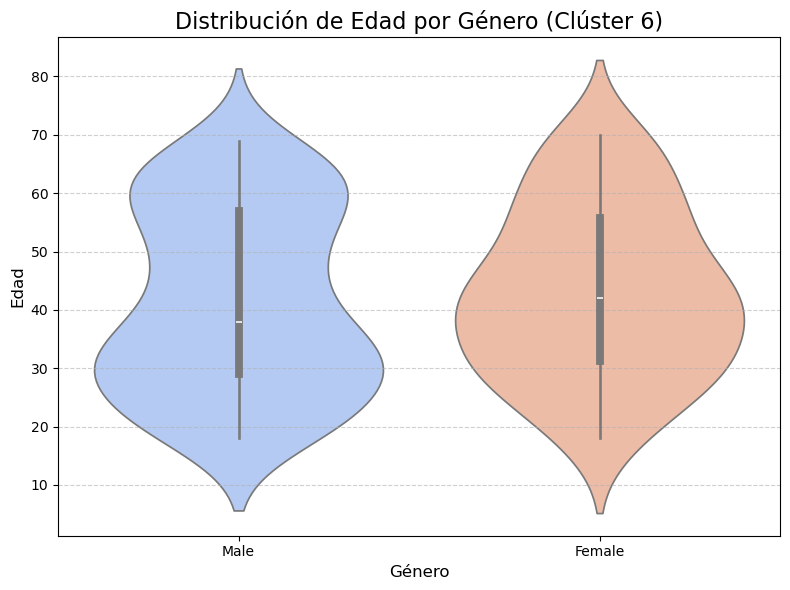

### Conclusiones del Análisis


El valor p ($0.5066$) es mayor o igual que el nivel de significancia ($0.05$). Esto indica que **no hay una diferencia estadísticamente significativa** en la distribución de edad entre los géneros masculino y femenino en el Clúster 6. La distribución de edad parece ser similar para ambos géneros en este clúster.


In [8]:
# Pregunta en Markdown para el cuaderno
display(Markdown("# ¿Existe alguna diferencia entre la edad y el género en el Clúster 6?"))
display(Markdown("El siguiente análisis explorará si el número de compras previas (`Previous Purchases`) es estadísticamente diferente entre los géneros (`Gender`), utilizando una prueba no paramétrica U de Mann-Whitney y un gráfico de violín."))

# 1. Separamos los datos de 'Age' por género
male_age = df_cluster_6[df_cluster_6['Gender'] == 'Male']['Age']
female_age = df_cluster_6[df_cluster_6['Gender'] == 'Female']['Age']

# 2. Realizamos la prueba U de Mann-Whitney
# Esta prueba determinará si hay una diferencia significativa en las medianas de las edades entre los dos géneros
u_statistic, p_value = mannwhitneyu(male_age, female_age)

# Imprimimos los resultados de la prueba
print("\n# Resultado de la Prueba U de Mann-Whitney")
print(f"Estadístico U: {u_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# 3. Creamos un gráfico de violín para visualizar la distribución de edades
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Age', data=df_cluster_6, palette='coolwarm')

# Personalizamos el gráfico
plt.title('Distribución de Edad por Género (Clúster 6)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Conclusión del análisis en formato Markdown
print("\n" + "="*50 + "\n")
display(Markdown('### Conclusiones del Análisis'))
if p_value < 0.05:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es menor que el nivel de significancia ($0.05$). Esto indica una **diferencia estadísticamente significativa** en la distribución de edad entre los géneros masculino y femenino en el Clúster 6. El gráfico de violín sugiere que las medianas o las distribuciones de edad son diferentes entre ambos grupos.
"""))
else:
    display(Markdown(f"""
El valor p (${p_value:.4f}$) es mayor o igual que el nivel de significancia ($0.05$). Esto indica que **no hay una diferencia estadísticamente significativa** en la distribución de edad entre los géneros masculino y femenino en el Clúster 6. La distribución de edad parece ser similar para ambos géneros en este clúster.
"""))
